#  Comparison of L1 minimization, IHT and NSIHT algorithms 


In [18]:
import numpy as np
import math
import random
from random import seed
from random import random
from numpy import linalg as LA
import scipy.linalg.interpolative
import random
import matplotlib.pyplot as plt
import cvxpy as cp

In [19]:
def hard_thresh(x_mat,s):  # function for hard thresholding
    n=len(x_mat)
    val=[]
    
    x_mat_temp=np.array
    x_mat_temp=np.absolute(x_mat)
    ind=x_mat_temp.argsort(axis=0)
    
    val=ind[-s:]
    
    for i in range(n):
        if i not in val:
            x_mat[i]=0
        
             
    return(x_mat)

In [20]:
def l1_minimization(m,N,s,N_mc):
    
    probability=[]
    m_val=[]
    diff_l1=[]
    diff_it=[]
    val=[]
    for m in range (20,m,20):
        succ=0

        m_val.append(m)
        for i in range(N_mc):
            A=np.random.randn(m,N) # measurement matrix
            x =np.zeros((N,1))

            import random
            randomlist = random.sample(range(0, N-1), s)  # indeces for non zero values

            from random import random

            for i in randomlist:
                x[i]=random()  

            y=A.dot(x)  

            za= cp.Variable((N,1))
            z1a=cp.norm(za,1)

            prob = cp.Problem(cp.Minimize(z1a),[A*za==y])  #min z1 st az=y
            prob.solve(abstol=1e-15) 

            z_star=hard_thresh(za.value,s)

            if (LA.norm((x-z_star),2)/LA.norm(x,2))<1e-3:
                succ=succ+1

            diff=z_star-x
            val.append(LA.norm(diff))
            diff_l1.append(LA.norm(diff))
        
        probability.append(succ/N_mc)
    return m_val,probability,diff_l1     


In [21]:
def iht_algo (A,y,s,h,max_iter,tol,xn,x,N):
    iteration=0
    rel_incr=10       
    xn1=np.zeros((N,1))  
    
    while iteration<max_iter and rel_incr>tol:
        A_trans=A.transpose()
        xn1=xn+(h*(A_trans.dot((y-(A.dot(xn))))))
        xn1=hard_thresh(xn1,s)
        rel_incr=LA.norm(xn1-xn)/LA.norm(xn1)
        xn=xn1
           
    return xn

In [22]:
def IHT(N,m,s,N_mc):
    prob=[]
    m_val=[]
    diff_iht=[]
    for m in range (20,m,20):
        succ=0
        m_val.append(m)
        for iter_mc in range(N_mc):
            A=np.random.randn(m,N) # measurement matrix
            x =np.zeros((N,1))
            a=LA.norm(A,2)
            A=A/(a)
            import random
            randomlist = random.sample(range(0, N-1), s) # indeces for non zero values
            from random import random
        
            for i in randomlist:
                x[i]=random()  

            y=A.dot(x)  

            xn=np.zeros((N,1))
            xnplus1=iht_algo(A,y,s,1,100,1e-8,xn,x,N)
            
            diff=xnplus1-x
            diff_iht.append(LA.norm(diff))
        
            if (LA.norm((x-xnplus1),2)/LA.norm(x,2))<1e-3:
                succ=succ+1

        prob.append(succ/N_mc)
        
    return prob,diff_iht

In [23]:
def nsiht_algo (A,y,s,e,h,max_iter,xn,x,tol,N):
    iteration=0
    rel_incr=10
    
    I=np.identity(N)
    xn1=np.zeros((N,1)) #xn+1
    
    while iteration<max_iter and rel_incr>tol:
        
        A_trans=A.transpose()
        inv=(A_trans.dot(A))+(e*I)
        inv=np.linalg.inv(inv) 
        
        xn1=xn+(h*inv.dot((A_trans.dot(y-A.dot(xn)))))      
        xn1=hard_thresh(xn1,s)
       
        iteration=iteration+1      
        xn=xn1
           
    return xn 

In [24]:
def NSIHT (N,m,s,N_mc):
    prob=[]
    m_val=[]
    diff_nsiht=[]
    for m in range (20,m,20):
        succ=0
        m_val.append(m)
        for iter_mc in range(N_mc):
            A=np.random.randn(m,N) # measurement matrix
            x =np.zeros((N,1))
            a=LA.norm(A,2)
            A=A/(a)
            xminusxnorm=[]
            import random
            randomlist = random.sample(range(0, N-1), s) # indeces for non zero values
            from random import random

            for i in randomlist:
                x[i]=random()  

            y=A.dot(x)  
            xn=np.zeros((N,1))
            xn1=np.zeros((N,1)) #xn+1

            x_star=nsiht_algo(A,y,s,1,1,700,xn,x,1e-6,N)

            if (LA.norm((x-x_star),2)/LA.norm(x,2))<1e-3:
                        succ=succ+1
                    
            diff=x_star-x
            diff_nsiht.append(LA.norm(diff))
        prob.append(succ/N_mc)
        
    return prob,diff_nsiht

In [25]:
def recovery_plots(m_val,prob_l1,prob_iht,prob_nsiht):
    plt.title('Probability of recovery',fontsize=20)

    plt.plot(m_val,prob_l1)
    plt.plot(m_val,prob_iht)
    plt.plot(m_val,prob_nsiht)


    plt.legend(['L1 min', 'IHT', 'NSIHT'])
    plt.xlabel('m')
    plt.ylabel('recovery probability ')

    plt.show()

In [26]:
def relative_error(diff_l1,diff_iht,diff_nsiht,N_mc,m):
    l1_val = [diff_l1[i:i+N_mc] for i in range(0, len(diff_l1), N_mc)]
    iht_val = [diff_iht[i:i+N_mc] for i in range(0, len(diff_iht), N_mc)]
    nsiht_val = [diff_nsiht[i:i+N_mc] for i in range(0, len(diff_nsiht), N_mc)]
    k=len(l1_val)
    v=[]
    for i in range(20,m,20):
        v.append(i)
    v
    j=int(N_mc-1)/2
    j=int(j)
    print('\033[1m' +"ERROR IN RECOVERY AT DIFFERENT VALUES FOR m" )
    for i in range(k):
        plt.title( v[i],fontsize=13)    
        plt.plot(l1_val[i])
        plt.plot(iht_val[i])
        plt.plot(nsiht_val[i])
        plt.yscale('log')
        plt.legend(['L1 min', 'IHT', 'NSIHT'])
        plt.ylabel('relative error')
        plt.ylabel('iteratios')
        plt.show()

    

In [27]:
m=100
N=100
s=2
N_mc=5

In [28]:
m_val,prob_l1,diff_l1=l1_minimization(m,N,s,N_mc)

C:\Users\Shamita\sd_anaconda3\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 21 times so far.

  warnings.warn(msg, UserWarning)
C:\Users\Shamita\sd_anaconda3\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 22 times so far.

  warnings.warn(msg, UserWarning)
C:\Users

In [29]:
prob_iht,diff_iht=IHT(m,N,s,N_mc)

In [30]:
prob_nsiht,diff_nsiht=NSIHT(m,N,s,N_mc)

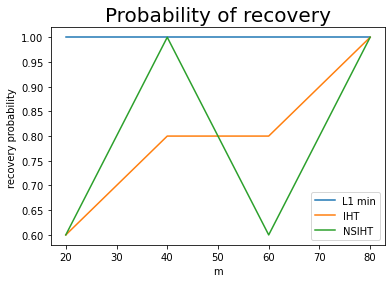

In [31]:
recovery_plots(m_val,prob_l1,prob_iht,prob_nsiht)

ERROR IN RECOVERY AT DIFFERENT VALUES FOR m


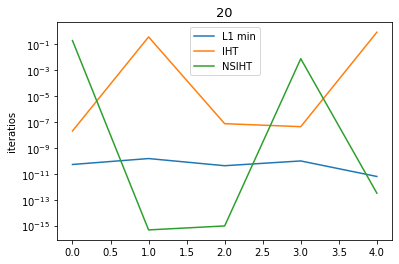

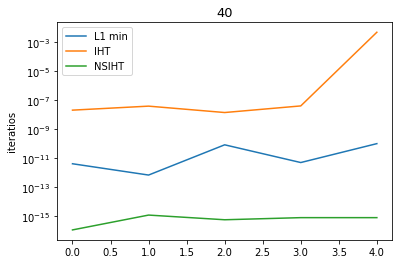

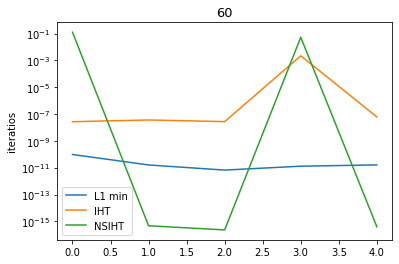

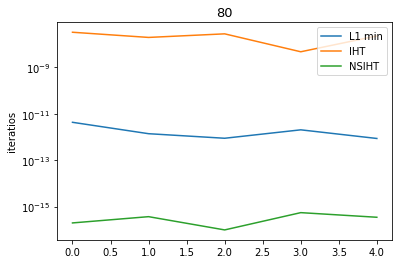

In [32]:
relative_error(diff_l1,diff_iht,diff_nsiht,N_mc,m)